In [ ]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('Unknown')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last_Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


In [3]:
df

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0


In [4]:
df['ObservationDate']

SNo
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
5        2020-01-22
            ...    
306425   2021-05-29
306426   2021-05-29
306427   2021-05-29
306428   2021-05-29
306429   2021-05-29
Name: ObservationDate, Length: 306429, dtype: datetime64[ns]

In [5]:
df= df.sort_values(by=['Province/State', 'ObservationDate'])

# make a daily new cases column
df['DailyNewCases']= df['Confirmed'].diff().clip(0).fillna(0)

# make a daily new deaths column
df['DailyNewdeathes']= df['Deaths'].diff().clip(0).fillna(0)

# make a daily new recovered column
df['DailyNewdrecovered']= df['Recovered'].diff().clip(0).fillna(0)

df

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered,DailyNewCases,DailyNewdeathes,DailyNewdrecovered
SNo,,,,,,,,,,
2745,2020-02-28,"Montreal, QC",Canada,2020-02-28 05:23:07,1.0,0.0,0.0,0.0,0.0,0.0
2864,2020-02-29,"Montreal, QC",Canada,2020-02-28 05:23:07,1.0,0.0,0.0,0.0,0.0,0.0
2994,2020-03-01,"Montreal, QC",Canada,2020-02-28 05:23:07,1.0,0.0,0.0,0.0,0.0,0.0
3128,2020-03-02,"Montreal, QC",Canada,2020-02-28 05:23:07,1.0,0.0,0.0,0.0,0.0,0.0
3279,2020-03-03,"Montreal, QC",Canada,2020-02-28 05:23:07,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
303369,2021-05-25,Zuid-Holland,Netherlands,2021-05-26 04:20:35,388457.0,4237.0,0.0,594.0,4.0,0.0
304134,2021-05-26,Zuid-Holland,Netherlands,2021-05-27 04:20:59,389035.0,4239.0,0.0,578.0,2.0,0.0
304899,2021-05-27,Zuid-Holland,Netherlands,2021-05-28 04:20:36,389881.0,4245.0,0.0,846.0,6.0,0.0


In [6]:
df_grouped= df.groupby('Province/State').agg({'Confirmed': 'std','Deaths': 'std', 'Recovered': 'std'}).fillna(0)


In [7]:
top_states = df_grouped.sort_values("Confirmed", ascending=False).head(10)
top_states


,Confirmed,Deaths,Recovered
Province/State,,,
England,1.518199e+06,31592.849978,0.000000e+00
California,1.456608e+06,21621.950979,6.991604e-01
Maharashtra,1.381334e+06,20177.848651,1.247891e+06
Texas,1.083216e+06,18070.894422,0.000000e+00
Sao Paulo,8.801272e+05,26404.401854,8.093038e+05
Florida,7.896299e+05,12269.342797,0.000000e+00
New York,6.554938e+05,12815.971255,0.000000e+00
Kerala,6.053603e+05,2100.904069,5.356461e+05
Karnataka,5.457748e+05,5656.546251,4.562475e+05


## note on melt 

Excellent question 👏 — understanding `melt()` is super important for reshaping DataFrames in **pandas**, especially for visualization or analysis.

Let’s break it down clearly and deeply 👇

---

### 🔹 What `melt()` Does

`pandas.melt()` **converts a wide DataFrame into a long format**.

In simpler terms:

* It **“unpivots”** your data — turning **columns into rows**.
* It’s the opposite of `pivot()` or `pivot_table()`.

This is very useful when you want to make your data tidy and ready for plotting with tools like **Seaborn** or **Matplotlib**.

---

### 🧩 Example Before and After Melt

Suppose we have this DataFrame:

```python
import pandas as pd

data = {
    'Province/State': ['Cairo', 'Giza', 'Alexandria'],
    'Confirmed': [500, 300, 200],
    'Deaths': [50, 30, 20]
}

df = pd.DataFrame(data)
print(df)
```

**Output (wide format):**

| Province/State | Confirmed | Deaths |
| -------------- | --------- | ------ |
| Cairo          | 500       | 50     |
| Giza           | 300       | 30     |
| Alexandria     | 200       | 20     |

Now, apply melt:

```python
df_melted = df.melt(
    id_vars="Province/State",
    value_vars=["Confirmed", "Deaths"],
    var_name="Metric",
    value_name="Std"
)
print(df_melted)
```

**Output (long format):**

| Province/State | Metric    | Std |
| -------------- | --------- | --- |
| Cairo          | Confirmed | 500 |
| Giza           | Confirmed | 300 |
| Alexandria     | Confirmed | 200 |
| Cairo          | Deaths    | 50  |
| Giza           | Deaths    | 30  |
| Alexandria     | Deaths    | 20  |

---

### 🔍 Explanation of Each Parameter

#### 🧠 `id_vars`

* Columns you **want to keep as identifiers** (they stay the same).
* Example: `"Province/State"` — this column identifies the data source (Cairo, Giza...).

#### 🧠 `value_vars`

* Columns you **want to unpivot** (turn from columns → into rows).
* Example: `["Confirmed", "Deaths"]` — these become the *Metric* values.

#### 🧠 `var_name`

* The **name of the new column** that will store the names of the original columns.
* Example: `"Metric"` — now contains `"Confirmed"` or `"Deaths"`.

#### 🧠 `value_name`

* The **name of the new column** that will store the numeric values from those columns.
* Example: `"Std"` — now contains 500, 300, 200, etc.

---

### 🧭 Why Use It?

`melt()` helps convert your data into a **tidy format**:

* Each row represents **one observation**.
* Each column represents **one variable**.

This structure is perfect for:

* Plotting with **Seaborn** (`sns.barplot`, `sns.lineplot`, etc.)
* Running grouped or aggregated analysis
* Merging and joining with other tidy DataFrames

---

### 💡 Summary Table

| Parameter    | Purpose                      | Example in Your Code      |
| ------------ | ---------------------------- | ------------------------- |
| `id_vars`    | Columns to keep as is        | `"Province/State"`        |
| `value_vars` | Columns to turn into rows    | `["Confirmed", "Deaths"]` |
| `var_name`   | Name for new variable column | `"Metric"`                |
| `value_name` | Name for new values column   | `"Std"`                   |


In [8]:
df_melted = top_states.reset_index().melt(
    id_vars="Province/State",
    value_vars=["Confirmed", "Deaths"],
    var_name="Metric",
    value_name="Std"
)
df_melted

,Province/State,Metric,Std
0,England,Confirmed,1.518199e+06
1,California,Confirmed,1.456608e+06
2,Maharashtra,Confirmed,1.381334e+06
3,Texas,Confirmed,1.083216e+06
4,Sao Paulo,Confirmed,8.801272e+05
5,Florida,Confirmed,7.896299e+05
6,New York,Confirmed,6.554938e+05
7,Kerala,Confirmed,6.053603e+05
8,Karnataka,Confirmed,5.457748e+05
9,Illinois,Confirmed,4.972094e+05


## note about: lambda x, _: f'{int(x):,}

| Symbol          | Meaning                       | Example      |
| --------------- | ----------------------------- | ------------ |
| `x`             | The tick’s numeric value      | 1000000      |
| `_`             | The tick’s position (ignored) | 0, 1, 2, ... |
| `f'{int(x):,}'` | Formats number with commas    | 1,000,000    |


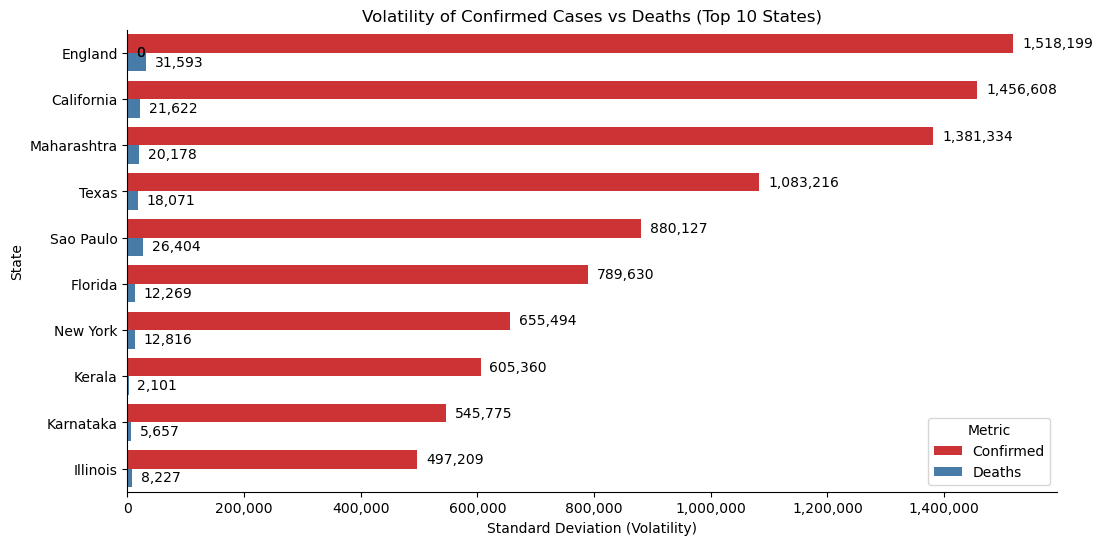

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=df_melted, 
    x="Std", y="Province/State", hue="Metric", palette="Set1"
)

# Add labels (real values) on the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + (0.01 * df_melted["Std"].max()),  # small offset
        p.get_y() + p.get_height()/2,
        f"{width:,.0f}",  # formatted with commas
        va="center"
    )

# Format x-axis with real values (not scientific notation)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Titles and axis labels
sns.despine()

plt.title("Volatility of Confirmed Cases vs Deaths (Top 10 States)")
plt.xlabel("Standard Deviation (Volatility)")
plt.ylabel("State")

plt.show()